In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from allen_v1dd.client import OPhysClient
import h5py
import numpy as np
from allen_v1dd.stimulus_analysis.natural_scenes import NaturalScenes

/home/roozbehf/anaconda3/envs/abbasilab-v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:30: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


In [2]:
mouse_id = 'M427836' #slc5
col_vol_id = "11"
plane = 2
plane_name = f"Plane_{plane}"
valid_cell_index = 64

In [3]:
DATA_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/")
assert DATA_DIR.exists()
DATA_DIR.resolve()
client =  OPhysClient(DATA_DIR)
session = client.load_ophys_session(f"{mouse_id}_{col_vol_id}")

traces = session.get_traces(plane, trace_type="dff")
dff = traces.values   
# valid_dff = dff[dg.is_roi_valid, :]

event_traces = session.get_traces(plane, trace_type="events")
event = event_traces.values
# valid_event = event[dg.is_roi_valid, :]

In [4]:
cell_num = 6

In [5]:
stim_names = ["spontaneous", "locally_sparse_noise", "drifting_gratings_full", "drifting_gratings_windowed", "natural_images", "natural_images_12", "natural_movie"]

stim_table_tuple = session.get_stimulus_table("spontaneous")
stim_table = stim_table_tuple[0]
print(stim_table)

        start          end
0  881.605591  1181.838745


In [6]:
stim_table_tuple = session.get_stimulus_table("locally_sparse_noise")
stim_table = stim_table_tuple[0]
print(stim_table[0:700])

          start         end  frame
0    640.404907  640.705261      0
1    640.721863  641.022095      1
2    641.038757  641.339050      2
3    641.355713  641.655945      3
4    641.672668  641.972900      4
..          ...         ...    ...
695  860.671509  860.971741    695
696  860.988464  861.288696    696
697  861.305359  861.605591    697
698  861.622314  861.922546    698
699  861.939209  862.239502    699

[700 rows x 3 columns]


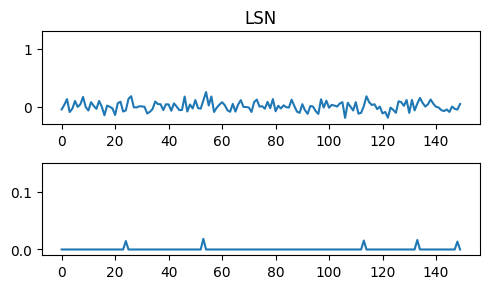

In [7]:
time_mask_start = 640
time_mask_end = 790

plt.figure(figsize=(5, 3))

plt.subplot(2, 1, 1)
plt.plot(dff[cell_num, time_mask_start:time_mask_end])
plt.ylim([-0.3, 1.3])
plt.title("LSN")

plt.subplot(2, 1, 2)
plt.plot(event[6, time_mask_start:time_mask_end])
plt.ylim([-0.01, 0.15])
plt.tight_layout()
# plt.savefig("lsn_dff_event.eps", format="eps")

In [8]:
stim_table_tuple = session.get_stimulus_table("drifting_gratings_full")
stim_table = stim_table_tuple[0]
print(stim_table[0:60])

         start         end  temporal_frequency  spatial_frequency  direction
0    59.921925   61.906906                 1.0               0.04      270.0
1    62.924423   64.909477                 NaN                NaN        NaN
2    65.926987   67.911926                 1.0               0.08       90.0
3    68.929405   70.914467                 1.0               0.04      120.0
4    71.931923   73.916893                 1.0               0.08      150.0
5    74.934471   76.919395                 1.0               0.08       30.0
6    77.936913   79.921898                 1.0               0.08       90.0
7    80.939384   82.924454                 1.0               0.04      270.0
8    83.941917   85.926888                 1.0               0.04      120.0
9    86.944374   88.929382                 1.0               0.08      240.0
10   89.946968   91.931885                 1.0               0.08       90.0
11   92.949387   94.934364                 1.0               0.08      330.0

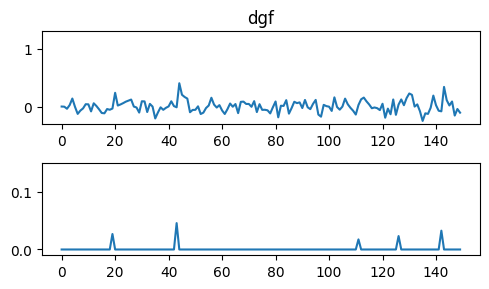

In [9]:
time_mask_start = 50
time_mask_end = 200

plt.figure(figsize=(5, 3))

plt.subplot(2, 1, 1)
plt.plot(dff[cell_num, time_mask_start:time_mask_end])
plt.ylim([-0.3, 1.3])
plt.title("dgf")

plt.subplot(2, 1, 2)
plt.plot(event[6, time_mask_start:time_mask_end])
plt.ylim([-0.01, 0.15])
plt.tight_layout()

# plt.savefig("dgf_dff_event.eps", format="eps")

In [10]:
stim_table_tuple = session.get_stimulus_table("drifting_gratings_windowed")
stim_table = stim_table_tuple[0]
print(stim_table[100:190])

           start          end  temporal_frequency  spatial_frequency  \
100  2431.895508  2433.880371                 1.0               0.08   
101  2434.897949  2436.883057                 1.0               0.08   
102  2437.900391  2439.885498                 1.0               0.04   
103  2440.902832  2442.887939                 1.0               0.08   
104  2443.905518  2445.890381                 1.0               0.04   
..           ...          ...                 ...                ...   
185  2687.107666  2689.092773                 1.0               0.08   
186  2690.110352  2692.095215                 1.0               0.04   
187  2693.112793  2695.097656                 1.0               0.04   
188  2696.115234  2698.100342                 1.0               0.04   
189  2699.117676  2701.102783                 1.0               0.08   

     direction  
100      120.0  
101      180.0  
102        0.0  
103       60.0  
104       30.0  
..         ...  
185        0.0  

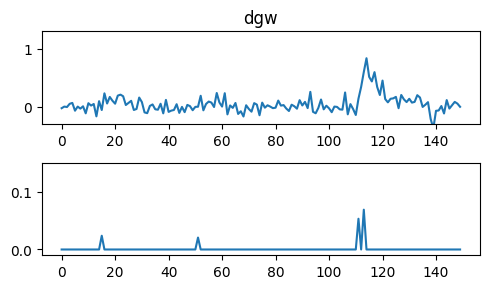

In [11]:
time_mask_start = 350
time_mask_end = 500

plt.figure(figsize=(5, 3))

plt.subplot(2, 1, 1)
plt.plot(dff[cell_num, time_mask_start:time_mask_end])
plt.ylim([-0.3, 1.3])
plt.title("dgw")

plt.subplot(2, 1, 2)
plt.plot(event[6, time_mask_start:time_mask_end])
plt.ylim([-0.01, 0.15])
plt.tight_layout()
# plt.savefig("dgw_dff_event.eps", format="eps")

In [12]:
stim_table_tuple = session.get_stimulus_table("natural_images_12")
stim_table = stim_table_tuple[0]
print(stim_table)#[100:190])

           start          end  image  image_index
0    1184.857788  1185.158081      0           29
1    1185.174805  1185.475098      1            4
2    1185.491699  1185.791992      2           23
3    1185.808594  1186.108887      3           32
4    1186.125610  1186.425781      4            9
..           ...          ...    ...          ...
475  1335.399780  1335.700073      7           62
476  1335.716797  1336.016968      8           27
477  1336.033691  1336.333984      9            6
478  1336.350586  1336.650879     10            2
479  1336.667480  1336.967773     11            5

[480 rows x 4 columns]


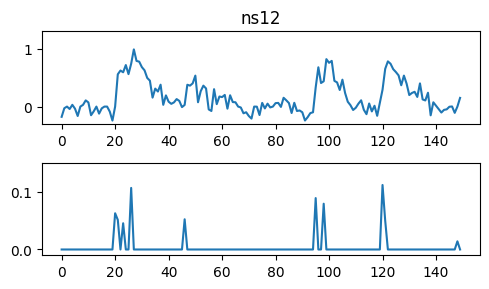

In [13]:
time_mask_start = 1184
time_mask_end = 1334

plt.figure(figsize=(5, 3))

plt.subplot(2, 1, 1)
plt.plot(dff[cell_num, time_mask_start:time_mask_end])
plt.ylim([-0.3, 1.3])
plt.title("ns12")

plt.subplot(2, 1, 2)
plt.plot(event[6, time_mask_start:time_mask_end])
plt.ylim([-0.01, 0.15])
plt.tight_layout()

# plt.savefig("ns12_dff_event.eps", format="eps")

In [14]:
stim_table_tuple = session.get_stimulus_table("natural_images")
stim_table = stim_table_tuple[0]
print(stim_table)#[100:190])

           start          end  image  image_index
0    2105.624023  2105.924072      0            0
1    2105.940918  2106.241211      1            1
2    2106.257812  2106.558105      2            2
3    2106.574707  2106.875000      3            3
4    2106.891602  2107.191895      4            4
..           ...          ...    ...          ...
939  2403.221680  2403.521729    231          109
940  2403.538574  2403.838867    232           73
941  2403.855469  2404.155762    233           74
942  2404.172363  2404.472656    234           63
943  2404.489258  2404.789551    235           82

[944 rows x 4 columns]


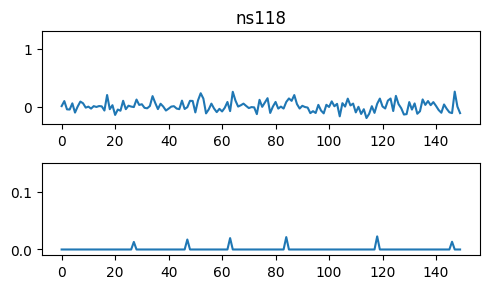

In [15]:
time_mask_start = 2105
time_mask_end = 2255

plt.figure(figsize=(5, 3))

plt.subplot(2, 1, 1)
plt.plot(dff[cell_num, time_mask_start:time_mask_end])
plt.ylim([-0.3, 1.3])
plt.title("ns118")

plt.subplot(2, 1, 2)
plt.plot(event[6, time_mask_start:time_mask_end])
plt.ylim([-0.01, 0.15])
plt.tight_layout()

# plt.savefig("ns118_dff_event.eps", format="eps")

In [16]:
stim_table_tuple = session.get_stimulus_table("natural_movie")
stim_table = stim_table_tuple[0]
print(stim_table)#[100:190])

            start          end  frame
0     1348.994507  1349.011108      0
1     1349.027832  1349.044556      1
2     1349.061157  1349.077881      2
3     1349.094604  1349.111206      3
4     1349.127930  1349.144531      4
...           ...          ...    ...
8995  1649.077515  1649.094116    895
8996  1649.110840  1649.127563    896
8997  1649.144165  1649.160889    897
8998  1649.177612  1649.194336    898
8999  1649.210938  1649.227661    899

[9000 rows x 3 columns]


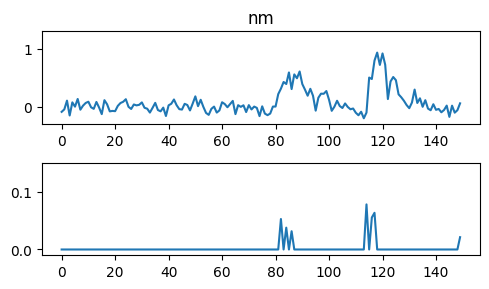

In [17]:
time_mask_start = 1348
time_mask_end = 1498

plt.figure(figsize=(5, 3))

plt.subplot(2, 1, 1)
plt.plot(dff[cell_num, time_mask_start:time_mask_end])
plt.ylim([-0.3, 1.3])
plt.title("nm")

plt.subplot(2, 1, 2)
plt.plot(event[6, time_mask_start:time_mask_end])
plt.ylim([-0.01, 0.15])
plt.tight_layout()

# plt.savefig("nm_dff_event.eps", format="eps")

### DGF and DGW

In [18]:
H5_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/v1dd_stimulus_analyses/stimulus_analyses_v2.h5")

In [19]:
all_dgf_mean_dffs = []
all_dgf_frac_resp_trials = []
with h5py.File(H5_DIR, 'r') as h5: 
    plane_info = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["drifting_gratings_full"]

    is_roi_valid = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["is_roi_valid"][()]               
    trial_responses = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["drifting_gratings_full"]["trial_responses"]
    trial_responses_valid = trial_responses[is_roi_valid]
    all_dgf_mean_dffs.append(trial_responses_valid)

    frac_resp_trials = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["drifting_gratings_full"]["frac_responsive_trials"][:]
    all_dgf_frac_resp_trials.append(frac_resp_trials)
    
all_dgf_mean_dffs_stacked = np.vstack(all_dgf_mean_dffs)


In [20]:
all_dgw_mean_dffs = []
all_dgw_frac_resp_trials = []


with h5py.File(H5_DIR, 'r') as h5:   
    plane_info = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["drifting_gratings_windowed"]

    is_roi_valid = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["is_roi_valid"][()]               
    trial_responses = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["drifting_gratings_windowed"]["trial_responses"]
    trial_responses_valid = trial_responses[is_roi_valid]
    all_dgw_mean_dffs.append(trial_responses_valid)

    frac_resp_trials = h5[mouse_id][col_vol_id][f"Plane_{plane}"]["drifting_gratings_windowed"]["frac_responsive_trials"][:]
    all_dgw_frac_resp_trials.append(frac_resp_trials)
                    
all_dgw_mean_dffs_stacked = np.vstack(all_dgw_mean_dffs)

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def make_star_plot(data):
    angles = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])
    radii = np.array([0.04, 0.08])
    
    dominant_colors = [np.array([255, 240, 245]),  # very light pink
                       np.array([230, 196, 218]),
                       np.array([218, 142, 178]),
                       np.array([202, 90, 126]),
                       np.array([193, 60, 88])]
    
    n_bins = 100
    cmap_name = 'pink_gradient'
    
    dominant_colors_normalized = np.array(dominant_colors) / 255
    cmap_pink = LinearSegmentedColormap.from_list(cmap_name, dominant_colors_normalized, N=n_bins)
    vmin = np.min(data)
    vmax = np.max(data)
    
    sorted_indices = np.argsort(angles)
    angles_sorted = np.sort(angles)
    data_sorted = data[sorted_indices, :, :]
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='polar')
    
    for i, angle in enumerate(angles_sorted):
        angle_rad = np.deg2rad(angle)
        for j, radius in enumerate(radii):
            values = data_sorted[i, j, :]
            colors = cmap_pink((values - vmin) / (vmax - vmin))
            for k, value in enumerate(values):
                angle_adjusted = angle_rad + (k - len(values) / 2) * np.deg2rad(2)
                ax.scatter(angle_adjusted, value + radius, c=[colors[k]], s=20, marker='o', label=f'{radius}' if i == 0 and k == 0 else "")
    
    ax.set_rlabel_position(0)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.deg2rad(angles_sorted))  # Set the angular ticks correctly
    ax.set_xticklabels(angles_sorted.astype(int).astype(str))
    
    # Define the yticks to only include the desired radii
    ax.set_yticks([0.04, 0.08])
    ax.set_ylim(0, 0.1)

    # Make radial lines thinner
    ax.xaxis.set_tick_params(width=0.5)
    ax.yaxis.set_tick_params(width=0.5)

    # Remove the outer border
    ax.spines['polar'].set_visible(False)

    # Remove the default grid lines
    ax.grid(False)

    # Manually draw the radial lines for the inner part up to the 0.08 radius
    for angle in angles_sorted:
        angle_rad = np.deg2rad(angle)
        ax.plot([angle_rad, angle_rad], [0, 0.08], color='gray', linewidth=0.5)

    # Draw the circular grid lines for the desired radii
    ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, 0.04), color='gray', linewidth=0.2)
    ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, 0.08), color='gray', linewidth=0.2)
    
    handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles, labels)
    # plt.show()

    ax.set_xticklabels([])  # Remove angular tick labels
    ax.set_yticks([])       # Remove radial tick labels
    ax.set_xticklabels([])  # Remove angular tick labels
    ax.set_yticks([])       # Remove radial tick labels

# Example usage
# data should be a 3D numpy array with shape (12, 2, N)
# data = np.random.random((12, 2, N))
# make_star_plot(data)


In [149]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# def make_star_plot(data):
#     angles = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])
#     radii = np.array([0.04, 0.08])
    
#     dominant_colors = [np.array([255, 240, 245]),  # very light pink
#                        np.array([230, 196, 218]),
#                        np.array([218, 142, 178]),
#                        np.array([202, 90, 126]),
#                        np.array([193, 60, 88])]
    
#     n_bins = 100
#     cmap_name = 'pink_gradient'
    
#     dominant_colors_normalized = np.array(dominant_colors) / 255
#     cmap_pink = LinearSegmentedColormap.from_list(cmap_name, dominant_colors_normalized, N=n_bins)
#     vmin = np.min(data)
#     vmax = np.max(data)
    
#     sorted_indices = np.argsort(angles)
#     angles_sorted = np.sort(angles)
#     data_sorted = data[sorted_indices, :, :]
    
#     fig = plt.figure(figsize=(5, 5))
#     ax = fig.add_subplot(111, projection='polar')
    
#     for i, angle in enumerate(angles_sorted):
#         angle_rad = np.deg2rad(angle)
#         for j, radius in enumerate(radii):
#             values = data_sorted[i, j, :]
#             colors = cmap_pink((values - vmin) / (vmax - vmin))
#             num_values = len(values)
#             circle_radius = 0.001  # Radius of the circle shape for dots
#             for k, value in enumerate(values):
#                 angle_offset = 2 * np.pi * k / num_values  # Symmetrical offset
#                 angle_adjusted = angle_rad + angle_offset
#                 x_offset = circle_radius * np.cos(angle_offset)
#                 y_offset = circle_radius * np.sin(angle_offset)
#                 ax.scatter(angle_adjusted, value + radius + x_offset, c=[colors[k]], s=20, marker='o')

#     ax.set_rlabel_position(0)
#     ax.set_theta_zero_location('N')
#     ax.set_theta_direction(-1)
#     ax.set_xticks(np.deg2rad(angles_sorted))  # Set the angular ticks correctly
#     ax.set_xticklabels(angles_sorted.astype(int).astype(str))
    
#     # Define the yticks to only include the desired radii
#     ax.set_yticks([0.04, 0.08])
#     ax.set_ylim(0, 0.1)

#     # Make radial lines thinner
#     ax.xaxis.set_tick_params(width=0.5)
#     ax.yaxis.set_tick_params(width=0.5)

#     # Remove the outer border
#     ax.spines['polar'].set_visible(False)

#     # Remove the default grid lines
#     ax.grid(False)

#     # Manually draw the radial lines for the inner part up to the 0.08 radius
#     for angle in angles_sorted:
#         angle_rad = np.deg2rad(angle)
#         ax.plot([angle_rad, angle_rad], [0, 0.08], color='gray', linewidth=0.2)

#     # Draw the circular grid lines for the desired radii
#     ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, 0.04), color='gray', linewidth=0.2)
#     ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, 0.08), color='gray', linewidth=0.2)

#     # Example usage
#     # data should be a 3D numpy array with shape (12, 2, N)
#     # data = np.random.random((12, 2, N))
#     # make_star_plot(data)

# # Example usage
# # data should be a 3D numpy array with shape (12, 2, N)
# # data = np.random.random((12, 2, N))
# # make_star_plot(data)



In [150]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# def make_star_plot(data):
#     angles = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])
#     radii = np.array([0.04, 0.08])
    
#     dominant_colors = [np.array([255, 240, 245]),  # very light pink
#                        np.array([230, 196, 218]),
#                        np.array([218, 142, 178]),
#                        np.array([202, 90, 126]),
#                        np.array([193, 60, 88])]
    
#     n_bins = 100
#     cmap_name = 'pink_gradient'
    
#     dominant_colors_normalized = np.array(dominant_colors) / 255
#     cmap_pink = LinearSegmentedColormap.from_list(cmap_name, dominant_colors_normalized, N=n_bins)
#     vmin = np.min(data)
#     vmax = np.max(data)
    
#     sorted_indices = np.argsort(angles)
#     angles_sorted = np.sort(angles)
#     data_sorted = data[sorted_indices, :, :]
    
#     fig = plt.figure(figsize=(5, 5))
#     ax = fig.add_subplot(111, projection='polar')
    
#     for i, angle in enumerate(angles_sorted):
#         angle_rad = np.deg2rad(angle)
#         for j, radius in enumerate(radii):
#             values = data_sorted[i, j, :]
#             colors = cmap_pink((values - vmin) / (vmax - vmin))
#             for k, value in enumerate(values):
#                 angle_adjusted = angle_rad + (k - len(values) / 2) * np.deg2rad(2)
#                 ax.scatter(angle_adjusted, value + radius, c=[colors[k]], s=20, marker='o', label=f'{radius}' if i == 0 and k == 0 else "")
    
#     ax.set_rlabel_position(0)
#     ax.set_theta_zero_location('N')
#     ax.set_theta_direction(-1)
#     ax.set_xticks(np.deg2rad(angles_sorted))  # Set the angular ticks correctly
#     ax.set_xticklabels(angles_sorted.astype(int).astype(str))
    
#     # Define the yticks to only include the desired radii
#     ax.set_yticks([0.04, 0.08])
#     ax.set_ylim(0, 0.1)

#     # Make radial lines thinner
#     ax.xaxis.set_tick_params(width=0.5)
#     ax.yaxis.set_tick_params(width=0.5)

#     # Remove the outer border
#     ax.spines['polar'].set_visible(False)

#     # Remove the default grid lines
#     ax.grid(False)

#     # Manually draw the radial lines for the inner part up to the 0.08 radius
#     for angle in angles_sorted:
#         angle_rad = np.deg2rad(angle)
#         ax.plot([angle_rad, angle_rad], [0, 0.08], color='gray', linewidth=0.5)

#     # Draw the circular grid lines for the desired radii
#     ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, 0.04), color='gray', linewidth=0.5)
#     ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, 0.08), color='gray', linewidth=0.5)
    
#     handles, labels = ax.get_legend_handles_labels()
#     # ax.legend(handles, labels)
#     # plt.show()

# # Example usage
# # data should be a 3D numpy array with shape (12, 2, N)
# # data = np.random.random((12, 2, N))
# # make_star_plot(data)


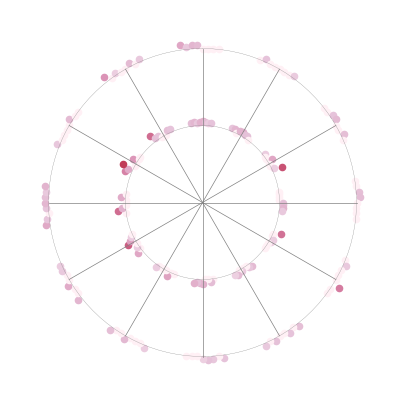

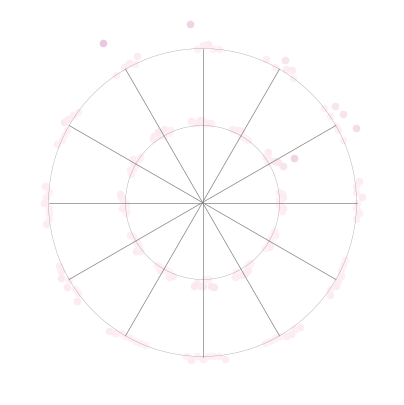

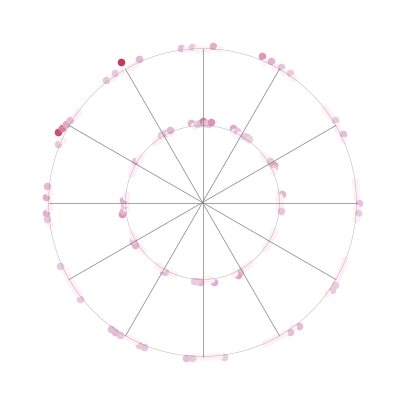

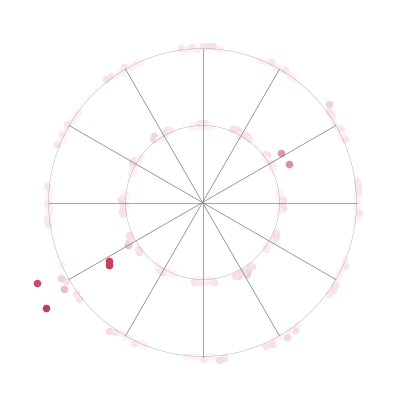

In [151]:
for j in [49, 107, 87, 57]:
    mean_dff_one_cell = all_dgf_mean_dffs_stacked[j,:,:,:]
    data = np.nan_to_num(mean_dff_one_cell)
    make_star_plot(data)
    # plt.savefig(f"dgf_star_{mouse_id}_{col_vol_id}_{plane}_cell{j}.eps", format="eps")

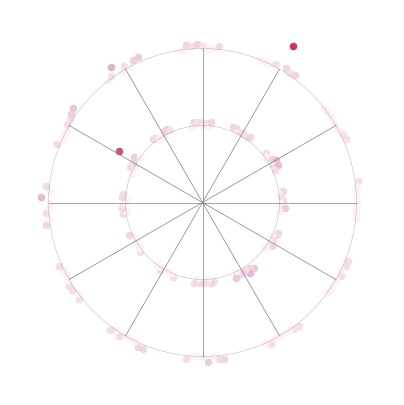

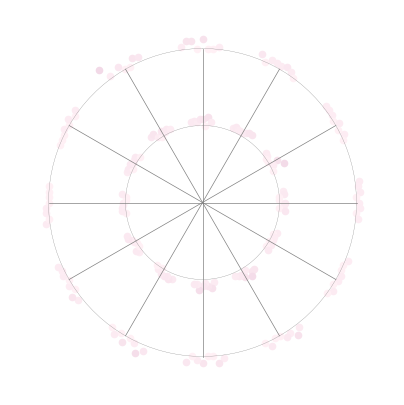

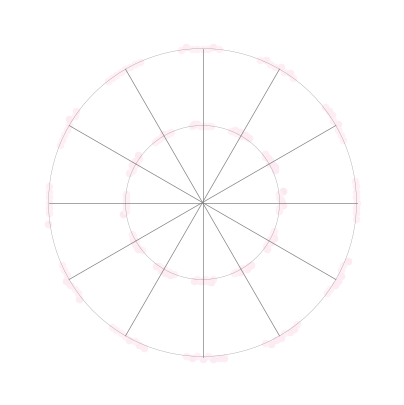

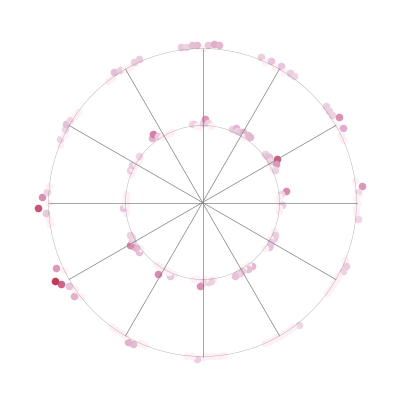

In [152]:
for j in [49, 107, 87, 57]:
    mean_dgw_one_cell = all_dgw_mean_dffs_stacked[j,:,:,:]
    data = np.nan_to_num(mean_dgw_one_cell)
    make_star_plot(data)
    # plt.savefig(f"dgw_star_{mouse_id}_{col_vol_id}_{plane}_cell{j}.eps", format="eps")

### Natural Scenes

In [109]:
def make_corona_plot(data):
    # dominant_colors = [
    #     np.array([253, 252, 253]),
    #     np.array([230, 196, 218]),
    #     np.array([218, 142, 178]),
    #     np.array([202, 90, 126]),
    #     np.array([193, 60, 88]),
    # ]
    # dominant_colors = [np.array([255, 240, 245]),  # very light pink
    #                    np.array([230, 196, 218]),
    #                    np.array([218, 142, 178]),
    #                    np.array([202, 90, 126]),
    #                    np.array([193, 60, 88])]
    # dominant_colors = [
    # np.array([240, 230, 230]),  # slightly lighter grayish pink
    # np.array([230, 196, 218]),
    # np.array([218, 142, 178]),
    # np.array([202, 90, 126]),
    # np.array([139, 0, 0])  # darker red
    # ]
    dominant_colors = [
        np.array([255, 245, 245]),  # even lighter pink
        np.array([230, 196, 218]),
        np.array([218, 142, 178]),
        np.array([202, 90, 126]),
        np.array([139, 0, 0])  # darker red
    ]
    n_bins = 100
    cmap_name = 'pink_gradient'
    dominant_colors_normalized = np.array(dominant_colors) / 255
    cmap_pink = LinearSegmentedColormap.from_list(cmap_name, dominant_colors_normalized, N=n_bins)

    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw={'aspect': 'equal'})
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    circle_radius = 0.3

    for i, row in enumerate(data):
        sorted_row = np.sort(row)[::-1]

        angle = i * (2 * np.pi / len(data))
        
        for j, val in enumerate(sorted_row):
            r = (j + 1) * circle_radius * 2
            x = r * np.cos(angle)
            y = r * np.sin(angle)
            
            color = cmap_pink(val / sorted_row.max())
            
            circle = plt.Circle((x, y), circle_radius, color=color, ec=(0.9, 0.6, 0.7), linewidth=0.1)
            ax.add_patch(circle)

    plt.axis('off')

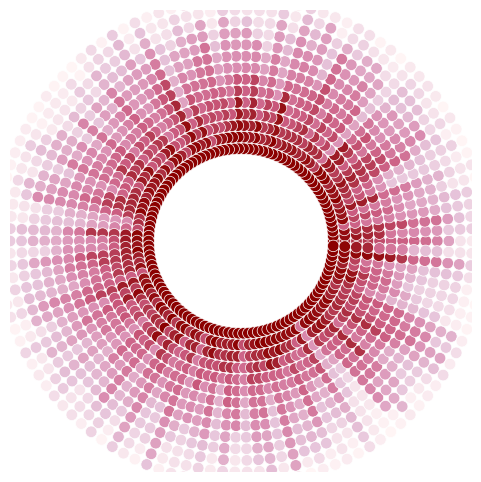

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def make_corona_plot(data):
    dominant_colors = [
        np.array([255, 245, 245]),  # even lighter pink
        np.array([230, 196, 218]),
        np.array([218, 142, 178]),
        np.array([202, 90, 126]),
        np.array([139, 0, 0])  # darker red
    ]
    
    n_bins = 100
    cmap_name = 'custom_gradient'
    dominant_colors_normalized = np.array(dominant_colors) / 255
    cmap_custom = LinearSegmentedColormap.from_list(cmap_name, dominant_colors_normalized, N=n_bins)

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'aspect': 'equal'})
    ax.set_xlim(-20, 20)  # Increased limits for a larger plot area
    ax.set_ylim(-20, 20)
    circle_radius = 0.5 # Reduced size of the circles

    for i, row in enumerate(data):
        # Sort the values in the row in descending order
        sorted_row = np.sort(row)[::-1]
        
        angle = i * (2 * np.pi / len(data))
        
        for j, val in enumerate(sorted_row):  # Use sorted_row instead of row
            r = 7 + (j + 1) * circle_radius * 2  # Start at radius 5 to create a larger inner circle
            x = r * np.cos(angle)
            y = r * np.sin(angle)
            
            color = cmap_custom(val / row.max())
            
            # Add a circle with a darker pink boundary
            circle = plt.Circle((x, y), circle_radius, color=color, ec=(1, 1, 1), linewidth=0.5)  # darker pink edge color
            ax.add_patch(circle)

    plt.axis('off')
    plt.show()

# Example data (just for testing)
data = np.random.rand(118, 14)
make_corona_plot(data)


In [144]:
sample_rate_hz = 6
cond_duration = 1
time_before = 0.5
time_after = 0.5
time_after_margin = 2
t_plot = int((cond_duration+time_after+time_before)*sample_rate_hz)
n_trials = 12

ns = NaturalScenes(session, plane, trace_type = "events")
valid_dff = dff[ns.is_roi_valid, :]
n_cells = valid_dff.shape[0]
n_time_points = 14
trial_count = 0

stim_table = session.get_stimulus_table("natural_images_12")
stim_table = stim_table[0]
images = stim_table.image_index.unique()
dff_trials = np.zeros((n_cells, n_time_points, len(images), 40))

for iimg, img in enumerate(images): 
    
    cond = stim_table[(stim_table["image_index"]==img)].reset_index(drop=True)

    for trial in range(len(cond)):
        trial_start = cond.start[trial]-time_before
        trial_end = cond.end[trial]+time_after+time_after_margin
        time_mask = (traces.indexes['time'] > trial_start) & (traces.indexes['time'] < trial_end)
        trial_dff = valid_dff[:, time_mask]
        dff_trials[:, :, iimg, trial] = trial_dff[:, :14]
    
dff_trials.shape

(109, 14, 12, 40)

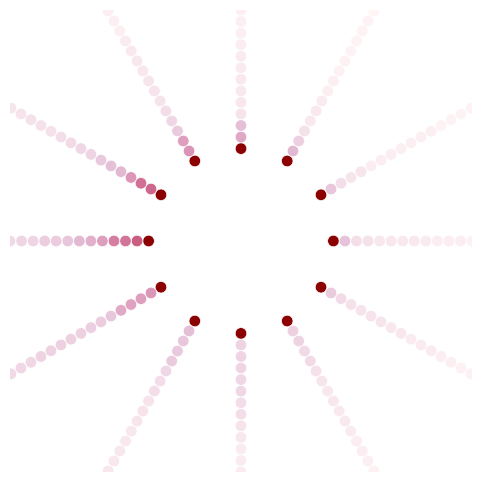

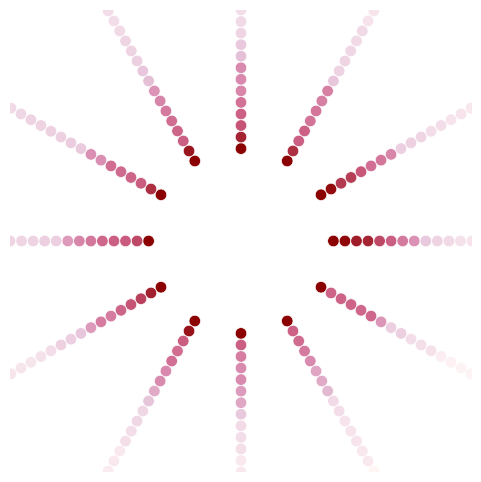

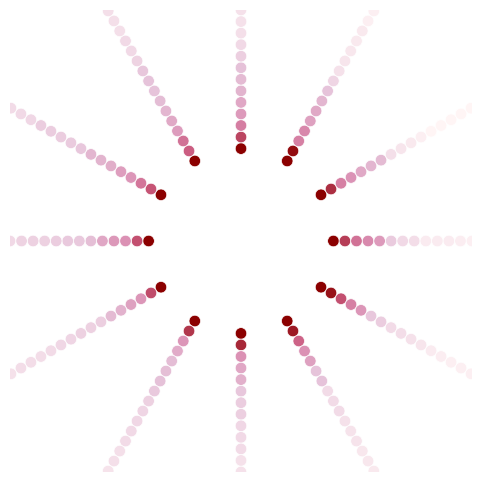

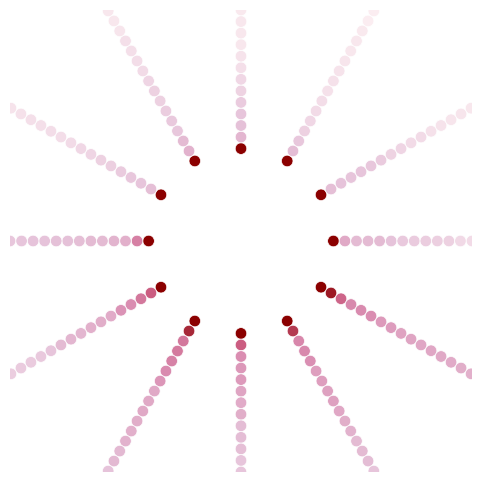

In [145]:
for j in [49, 107, 87, 57]:
    dff_trials_one_cell = dff_trials[j, :, :, :]
    mean_dff_one_cell = np.mean(dff_trials_one_cell, 0)
    make_corona_plot(mean_dff_one_cell)
    # plt.savefig(f"ns12_corona_{mouse_id}_{col_vol_id}_{plane}_cell{j}.eps", format="eps")

In [153]:
sample_rate_hz = 6
cond_duration = 1
time_before = 0.5
time_after = 0.5
time_after_margin = 2
t_plot = int((cond_duration+time_after+time_before)*sample_rate_hz)
n_trials = 12

valid_dff = dff[ns.is_roi_valid, :]
n_cells = valid_dff.shape[0]
n_time_points = 14

trial_count = 0

stim_table = session.get_stimulus_table("natural_images")
stim_table = stim_table[0]
images = stim_table.image_index.unique()
dff_trials = np.zeros((n_cells, n_time_points, len(images), 40))

for iimg, img in enumerate(images): 
    
    cond = stim_table[(stim_table["image_index"]==img)].reset_index(drop=True)

    for trial in range(len(cond)):
        trial_start = cond.start[trial]-time_before
        trial_end = cond.end[trial]+time_after+time_after_margin
        time_mask = (traces.indexes['time'] > trial_start) & (traces.indexes['time'] < trial_end)
        trial_dff = valid_dff[:, time_mask]
        dff_trials[:, :, iimg, trial] = trial_dff[:, :14]
    
dff_trials.shape

(109, 14, 118, 40)

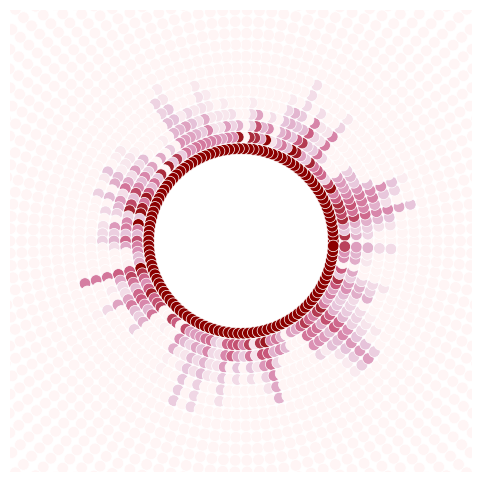

/tmp/ipykernel_2709414/3998360375.py:35: RuntimeWarning: invalid value encountered in double_scalars
  color = cmap_custom(val / row.max())
/tmp/ipykernel_2709414/3998360375.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  color = cmap_custom(val / row.max())


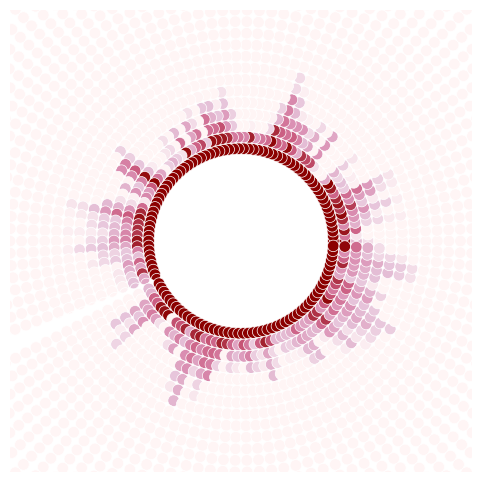

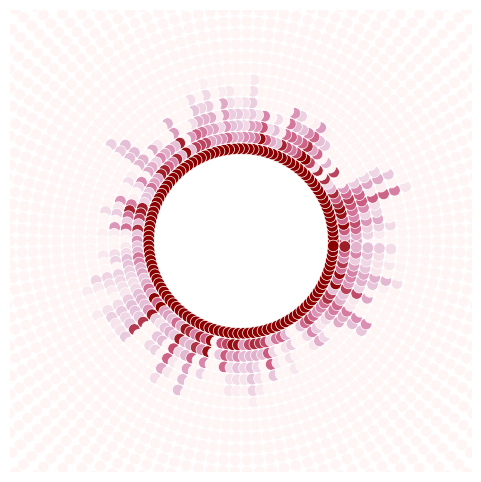

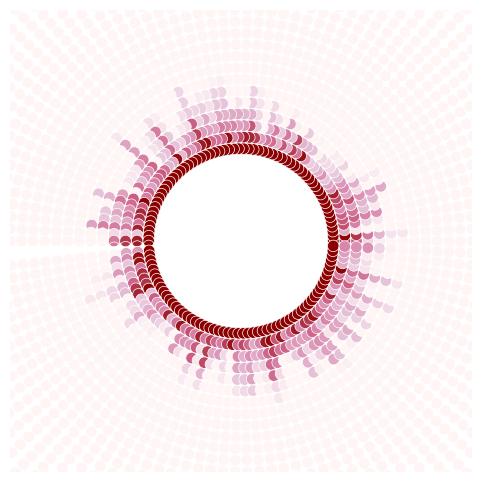

In [154]:
for j in [49, 107, 87, 57]:
    dff_trials_one_cell = dff_trials[j, :, :, :]
    mean_dff_one_cell = np.mean(dff_trials_one_cell, 0)
    make_corona_plot(mean_dff_one_cell)
    # plt.savefig(f"ns118_corona_{mouse_id}_{col_vol_id}_{plane}_cell{j}.eps", format="eps")

### Natural Movie

In [180]:
sample_rate_hz = 6
cond_duration = 1
time_before = 0.5
time_after = 0.5
time_after_margin = 2
t_plot = int((cond_duration+time_after+time_before)*sample_rate_hz)
n_trials = 12

valid_dff = dff[ns.is_roi_valid, :]
n_cells = valid_dff.shape[0]
n_time_points = 14

trial_count = 0

stim_table = session.get_stimulus_table("natural_movie")
stim_table = stim_table[0]
images = stim_table.frame.unique()
dff_trials = np.zeros((n_cells, n_time_points, len(images), 10))

for iimg, img in enumerate(images): 
    
    cond = stim_table[(stim_table["frame"]==img)].reset_index(drop=True)

    for trial in range(len(cond)):
        trial_start = cond.start[trial]-time_before
        trial_end = cond.end[trial]+time_after+time_after_margin
        time_mask = (traces.indexes['time'] > trial_start) & (traces.indexes['time'] < trial_end)
        trial_dff = valid_dff[:, time_mask]
        dff_trials[:, :, iimg, trial] = trial_dff[:, :14]
    
dff_trials.shape

(109, 14, 900, 10)

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap

def make_track_plot(dff_trials_one_cell, n_trials=10, sample_rate_hz=6, cond_duration=1, time_before=0.5, time_after=0.5):
    # Define colormaps for red and blue with smaller values closer to white
    cmap_red = LinearSegmentedColormap.from_list('custom_red', [(1, 1, 1), (139/255, 0, 0)], N=256)
    cmap_blue = LinearSegmentedColormap.from_list('custom_blue', [(1, 1, 1), (0, 0, 139/255)], N=256)
    
    
    norm = Normalize(vmin=np.min(dff_trials_one_cell), vmax=np.max(dff_trials_one_cell))

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'aspect': 'equal'})
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    
    n_time_points, n_images = dff_trials_one_cell.shape

    # Plotting the trials in red
    for trial in range(min(n_trials, n_images)):  # Only plot up to n_trials trials
        for i in range(n_time_points):
            angle = i * (2 * np.pi / n_time_points)
            r = 5 + trial * 0.5  # Radial position for each trial

            x_start = r * np.cos(angle)
            y_start = r * np.sin(angle)
            x_end = (r + 0.5) * np.cos(angle)
            y_end = (r + 0.5) * np.sin(angle)

            value = dff_trials_one_cell[i, trial]
            color = cmap_red(norm(value))
            ax.plot([x_start, x_end], [y_start, y_end], color=color, linewidth=1)

    # Plotting the mean PSTH in blue with a wider radius
    mean_dff = np.mean(dff_trials_one_cell, axis=1)
    
    for i in range(n_time_points):
        angle = i * (2 * np.pi / n_time_points)
        
        r = 5 + (n_trials + 1) * 0.5
        x_start = r * np.cos(angle)
        y_start = r * np.sin(angle)
        x_end = (r + 1.0) * np.cos(angle)  # Increase the width of the outer blue part
        y_end = (r + 1.0) * np.sin(angle)
        
        value = mean_dff[i]
        color = cmap_blue(norm(value))
        ax.plot([x_start, x_end], [y_start, y_end], color=color, linewidth=1)

    plt.axis('off')
    plt.show()



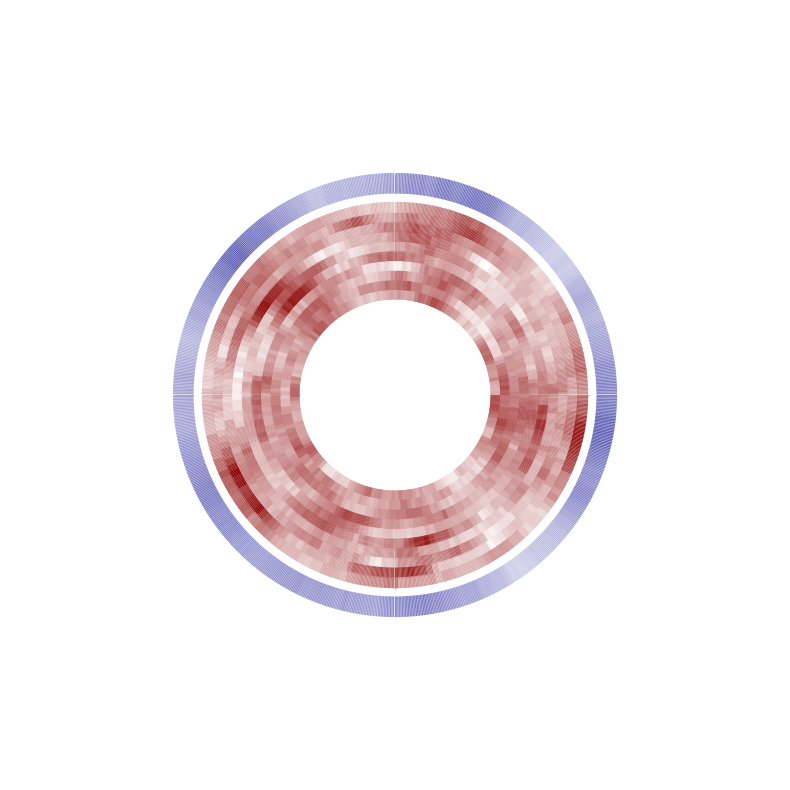

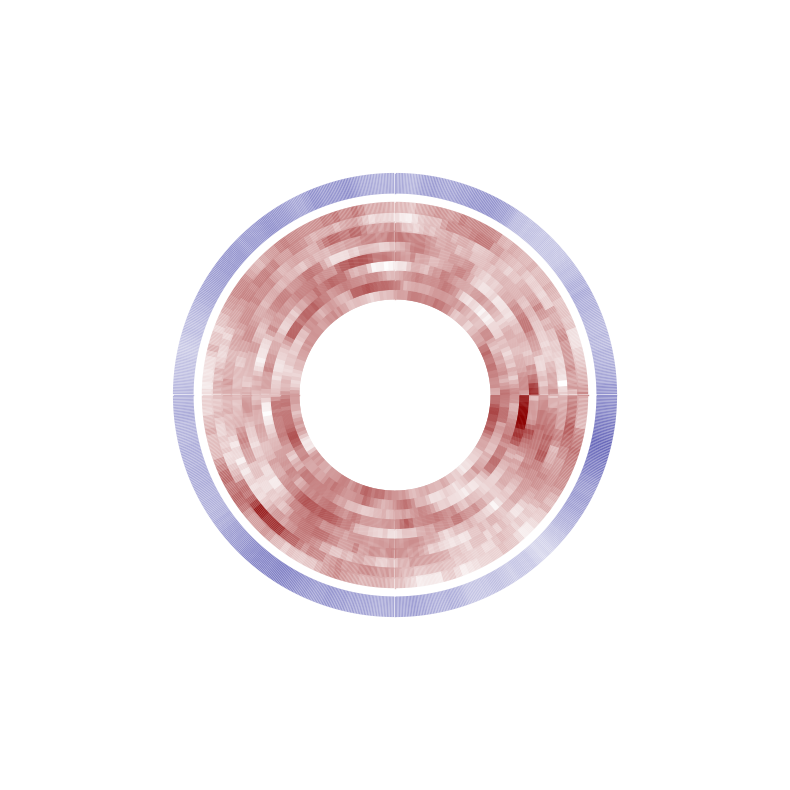

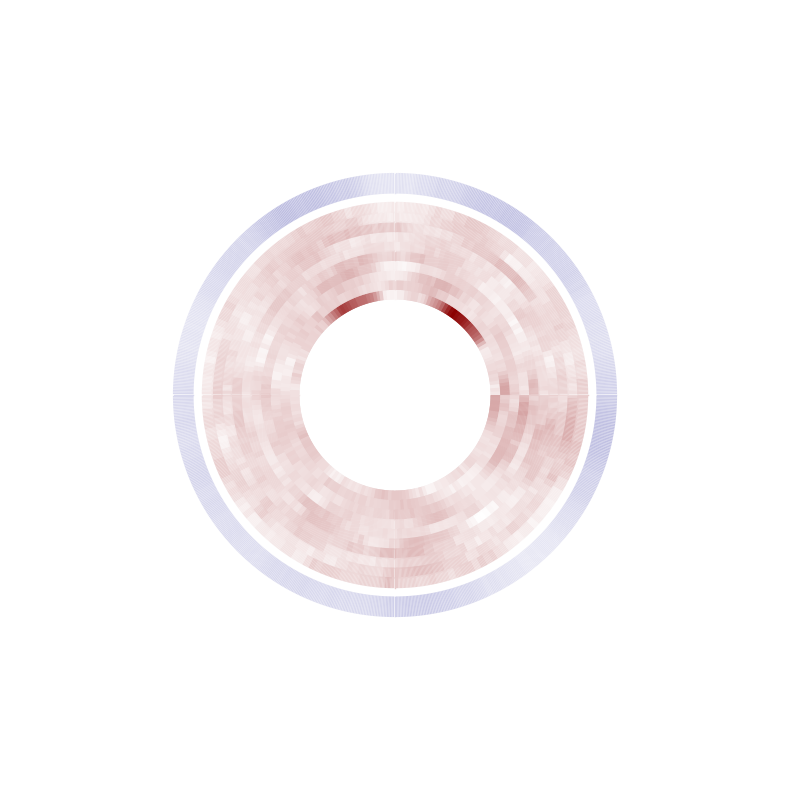

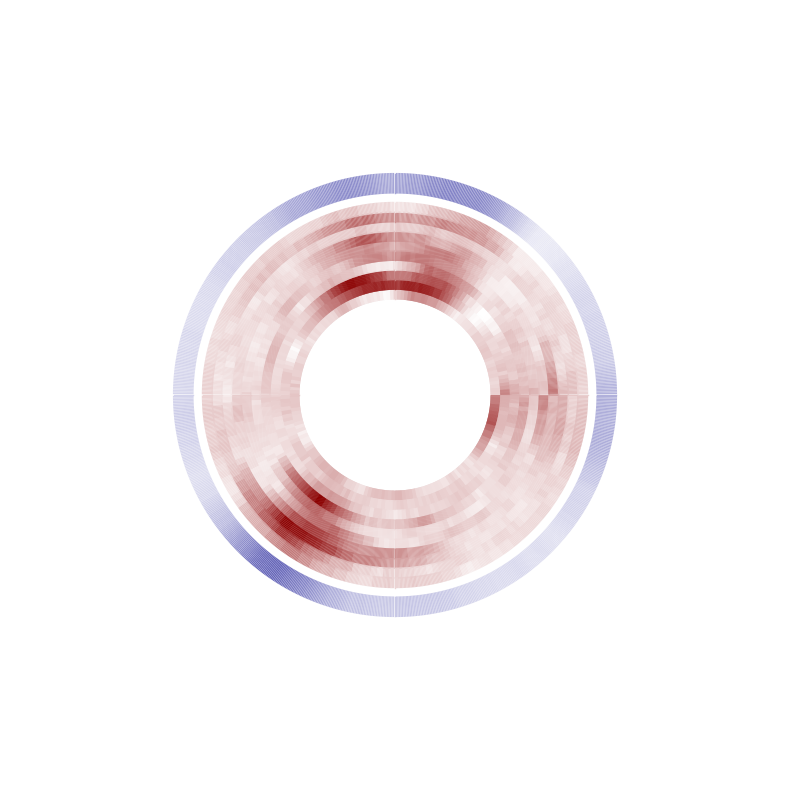

In [213]:
for j in [49, 107, 87, 57]:
    dff_trials_one_cell = dff_trials[j, :, :, :]
    mean_dff_one_cell = np.mean(dff_trials_one_cell, 0)
    make_track_plot(mean_dff_one_cell)

### ON/OFF Subfields

In [216]:
from allen_v1dd.stimulus_analysis import LocallySparseNoise
from abbasilab_v1dd.locally_sparse_noise.rf_utils import *

lsn = LocallySparseNoise(session, plane, trace_type = "events")

sample_rate_hz = 6
cond_duration = 1
time_before = 0.5
time_after = 0.5
time_after_margin = 1
t_plot = int((cond_duration+time_after+time_before)*sample_rate_hz)
n_trials = 1705
n_cells = valid_dff.shape[0]
n_time_points = 12

dff_trials = np.zeros((n_cells, n_time_points, n_trials))
trial_count = 0
for trial in range(n_trials):   
    trial_start = lsn.stim_table.start[trial]-time_before
    trial_end = lsn.stim_table.end[trial]+time_after+time_after_margin
    time_mask = (traces.indexes['time'] > trial_start) & (traces.indexes['time'] < trial_end)
    trial_dff = valid_dff[:, time_mask]
    dff_trials[:, :, trial] = trial_dff[:, :12]
    
dff_trials.shape

(109, 12, 1705)

In [217]:
s1, s2 = 8, 14
response_thresh_alpha = 0.05
nstd = 3
onset_delay = 1
offset_delay = 1
sample_spontaneous = 1000

In [218]:
if session is None:
    raise ValueError('Session not found')

all_lsn_vals_in_colvol_plane, all_pvals_in_colvol_plane, cell_indices  = calc_lsn_p_vals_for_col_vol_plane(session,
                                    plane,
                                    sample_spontaneous,
                                    onset_delay,
                                    offset_delay)

design_matrix, trial_template, frame_images = get_plane_lsn_constants(session)

In [219]:
all_x = []
all_y = []
all_depths = []
all_planes = []
all_columns = []
all_volumes = []
all2p3ps = []


lsn = LocallySparseNoise(session, plane, trace_type = "events")

for icell in range(lsn.n_rois_valid):
    roi_mask = session.get_roi_image_mask(plane, icell)
    y1, x1 = np.mean(np.where(roi_mask), axis=1, dtype=int)
    depth = session.get_plane_depth(plane)
    all_x.append(x1)
    all_y.append(y1)
    all_depths.append(depth)
    all_planes.append(plane)
    all_columns.append(session.column_id)
    all_volumes.append(session.volume_id)
    all2p3ps.append(int(session.scope_type[0]))

all_x = np.array(all_x)
all_y = np.array(all_y)    
all_depths = np.array(all_depths)
all_planes = np.array(all_planes)
all_columns = np.array(all_columns)
all_volumes = np.array(all_volumes)
all2p3ps = np.array(all2p3ps)

rf_metrics = {
    "mouse_id": mouse_id,
    "column": session.column_id,            
    "volume": session.volume_id,
    "col_vol": col_vol_id,
    "plane": plane,
    "data": {}
}

if lsn.n_rois_valid > 1:
    n_valid_cells_in_colvol_plane = lsn.n_rois_valid # all_pvals_in_colvol_plane.shape[1]
    n_trials = all_pvals_in_colvol_plane.shape[0]
    
    # initialization
    
    valid_cell_index = np.zeros(n_valid_cells_in_colvol_plane, dtype = int) 
    on_center_x = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_y = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_h = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_x = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_y = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_h = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_wx = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_wy = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_wx = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_wy = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_area = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_area = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_averaged_response_at_receptive_field = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_averaged_response_at_receptive_field = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    percentage_res_trial_4_locally_sparse_noise = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_trial_4_locally_sparse_noise = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_to_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_to_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)

    number_of_pixels = int(design_matrix.shape[0]/2) # 112
    number_of_tot_pixels = int(design_matrix.shape[0]/2)*2 # 224
    total_on_off_trials = design_matrix.dot(np.ones(n_trials))

    s1, s2 = 8, 14
    
    lsn_values = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    p_values = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    is_trial_sig = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    total_responsive_trials_all_pixels = np.zeros(n_valid_cells_in_colvol_plane)
    n_responsive_trials = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels), dtype = int)
    weighted_avg = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels))
    weighted_avg_only_resp_trials = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels))
    is_responsive = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_chi2 = np.zeros(n_valid_cells_in_colvol_plane)
    chi2_mat_thresholded = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))

    n_responsive_trials_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2), dtype = int)
    weighted_avg_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    weighted_avg_only_resp_trials_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    max_n_responsive_trials_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = int)
    is_responsive_to_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    z_score_mat_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    has_rf_zscore_on = np.zeros(n_valid_cells_in_colvol_plane)
    sig_on_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    max_wavg_on_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))    
    has_on_rf = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)

    n_responsive_trials_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2), dtype = int)
    weighted_avg_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    weighted_avg_only_resp_trials_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    max_n_responsive_trials_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = int)
    is_responsive_to_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    z_score_mat_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    has_rf_zscore_off = np.zeros(n_valid_cells_in_colvol_plane)
    sig_off_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    max_wavg_off_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    has_off_rf = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)

    chi2_mat = chi_square_RFs(all_lsn_vals_in_colvol_plane, trial_template)
    mu_spont = np.mean(all_lsn_vals_in_colvol_plane, 0)
    max_spont = np.max(all_lsn_vals_in_colvol_plane, 0)
    min_spont = np.min(all_lsn_vals_in_colvol_plane, 0)

In [220]:
for cell in range(n_valid_cells_in_colvol_plane):

    valid_cell_index[cell] = cell

    lsn_values[cell, :] = all_lsn_vals_in_colvol_plane[:, cell] 
    p_values[cell, :] = all_pvals_in_colvol_plane[:, cell]
    is_trial_sig[cell, :] = all_pvals_in_colvol_plane[:, cell] < response_thresh_alpha

    total_responsive_trials_all_pixels[cell] = is_trial_sig[cell, :].sum() 

    n_responsive_trials[cell, :] = design_matrix.dot(is_trial_sig[cell, :]) # just average
    percentage_res_trial_4_locally_sparse_noise[cell] = total_responsive_trials_all_pixels[cell]*100/is_trial_sig.shape[1]
    frac_res_trial_4_locally_sparse_noise[cell] = total_responsive_trials_all_pixels[cell]/is_trial_sig.shape[1]

    weighted_avg[cell, :] = design_matrix.dot(all_lsn_vals_in_colvol_plane[:, cell]) # weighted average (based on responsiveness score)

    only_resp_trials_design_matrix = design_matrix[:, is_trial_sig[cell, :].astype(bool)]
    lsn_vals_only_resp_trials = all_lsn_vals_in_colvol_plane[is_trial_sig[cell, :].astype(bool), cell]
    weighted_avg_only_resp_trials[cell, :] = only_resp_trials_design_matrix.dot(lsn_vals_only_resp_trials) # weighted average only based on responsive trials (based on responsiveness score)

    is_responsive[cell] = is_cell_responsive(n_responsive_trials[cell, :], weighted_avg[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std[cell] = cell_has_rf(weighted_avg[cell, :], nstd = nstd)
    chi2_mat_thresholded[cell, :, :] = chi2_mat[cell, :, :] < 0.05

    has_rf_chi2[cell] = chi2_mat_thresholded[cell, :, :].sum().astype(bool)
    
    # on analysis
    # total_on_trials = total_on_off_trials[:number_of_pixels].sum()
    # n_resp_on_trials = n_responsive_trials[cell, :number_of_pixels].sum()
    # frac_res_to_on[cell] = n_resp_on_trials / total_on_trials

    n_responsive_trials_on[cell, :, :] = n_responsive_trials[cell, :number_of_pixels].reshape(s1, s2)
    total_on_trials = total_on_off_trials[:number_of_pixels].reshape(s1, s2)
    frac_res_to_on[cell] = (n_responsive_trials_on[cell, :, :] / total_on_trials).max()

    on_frame_idxs = np.multiply(design_matrix[n_responsive_trials_on[cell, :, :].argmax()], is_trial_sig[cell, :].T).nonzero()[0]
    sig_on_frames[cell, on_frame_idxs] = 1

    on_wavg_frame_idxs = np.multiply(design_matrix[weighted_avg_on[cell, :, :].argmax()], is_trial_sig[cell, :].T).nonzero()[0]
    max_wavg_on_frames[cell, on_wavg_frame_idxs] = 1

    weighted_avg_on[cell, :, :] = weighted_avg[cell, :number_of_pixels].reshape(s1, s2)
    weighted_avg_only_resp_trials_on[cell, :, :] = weighted_avg_only_resp_trials[cell, :number_of_pixels].reshape(s1, s2)
    max_n_responsive_trials_on[cell] = n_responsive_trials_on[cell, :].max()
    is_responsive_to_on[cell] = is_cell_responsive(n_responsive_trials_on[cell, :], weighted_avg_on[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std_on [cell] = cell_has_rf(weighted_avg_on[cell, :], nstd = nstd)
    z_score_mat_on[cell, :, :], has_rf_zscore_on[cell] = rf_z_test(weighted_avg_on[cell, :])
    on_averaged_response_at_receptive_field[cell] = weighted_avg_on[cell, :, :].max()

    gauss_input = z_score_mat_on[cell, :, :]
    gauss_input_argmax = np.where(gauss_input == gauss_input.max())
    h_initial = gauss_input.max()
    x_initial = gauss_input_argmax[0]
    y_initial = gauss_input_argmax[1]
    on_params = centroid(gauss_input,
                    initial_weight=[x_initial,y_initial,h_initial,1,1]) #center_x, center_y, height, width_x, width_y)

    on_center_x[cell] = on_params[1]
    on_center_y[cell] = on_params[0]
    on_center_h[cell] = on_params[2]
    on_center_wx[cell] = on_params[4]*4
    on_center_wy[cell] = on_params[3]*4
    on_area[cell] = on_center_wx[cell] * on_center_wy[cell] * on_center_h[cell]
    has_on_rf [cell] = (on_center_wx[cell] < 5) and (on_center_wy[cell] < 5) and h_initial > 2.5

    # FIX ME: if wx or wy is > 4 means it did not converge. Find solution.
    
    # off analysis
    # total_off_trials = total_on_off_trials[number_of_pixels:].sum()
    # n_resp_off_trials = n_responsive_trials[cell, number_of_pixels:].sum()
    # frac_res_to_off[cell] = n_resp_off_trials / total_off_trials

    n_responsive_trials_off[cell, :, :] = n_responsive_trials[cell, number_of_pixels:].reshape(s1, s2)
    total_off_trials = total_on_off_trials[number_of_pixels:].reshape(s1, s2)
    frac_res_to_off[cell] = (n_responsive_trials_off[cell, :, :] / total_off_trials).max()

    off_frame_idxs = np.multiply(design_matrix[n_responsive_trials_off[cell, :, :].argmax()+112], is_trial_sig[cell, :].T).nonzero()[0]
    sig_off_frames [cell, off_frame_idxs] = 1

    off_wavg_frame_idxs = np.multiply(design_matrix[weighted_avg_on[cell, :, :].argmax()+112], is_trial_sig[cell, :].T).nonzero()[0]
    max_wavg_off_frames[cell, off_wavg_frame_idxs] = 1        

    weighted_avg_off[cell, :, :] = weighted_avg[cell, number_of_pixels:].reshape(s1, s2)
    weighted_avg_only_resp_trials_off[cell, :, :] = weighted_avg_only_resp_trials[cell, number_of_pixels:].reshape(s1, s2)  
    max_n_responsive_trials_off [cell] = n_responsive_trials_off[cell, :].max()
    is_responsive_to_off[cell] = is_cell_responsive(n_responsive_trials_off[cell, :], weighted_avg_off[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std_off[cell] = cell_has_rf(weighted_avg_off[cell, :], nstd = nstd)
    z_score_mat_off[cell, :, :], has_rf_zscore_off[cell] = rf_z_test(weighted_avg_off[cell, :])

    off_averaged_response_at_receptive_field[cell] = weighted_avg_off[cell, :, :].max()

    gauss_input = z_score_mat_off[cell, :, :]
    gauss_input_argmax = np.where(gauss_input == gauss_input.max())
    h_initial = gauss_input.max()
    x_initial = gauss_input_argmax[0]
    y_initial = gauss_input_argmax[1]
    off_params = centroid(gauss_input,
                    initial_weight=[x_initial,y_initial,h_initial,1,1]) #center_x, center_y, height, width_x, width_y)
    off_center_x[cell] = off_params[1]
    off_center_y[cell] = off_params[0]
    off_center_h[cell] = off_params[2]
    off_center_wx[cell] = off_params[4]*4
    off_center_wy[cell] = off_params[3]*4
    off_area[cell] = off_center_wx[cell] * off_center_wy[cell] * off_center_h[cell]
    has_on_rf [cell] = (off_center_wx[cell] < 5) and (off_center_wy[cell] < 5) and h_initial > 2.5 
    # FIX ME: if wx or wy is > 4 means it did not converge. Find solution

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [221]:
responsive_rois = []
for roi in range(dff_trials.shape[0]):

    dff_lsn_plot = dff_trials[roi, :, :].T
    mean_tts = []
    sem_tts = []
    for j in range(224):
        ind = lsn.design_matrix[j, :]
        mean_tts.append(np.mean(dff_lsn_plot[ind, :t_plot], axis = 0).tolist())
        sem_tts.append(stats.sem(dff_lsn_plot[ind, :t_plot], axis = 0).tolist())

    mean_tts = np.array(mean_tts)
    sem_tts = np.array(sem_tts)
   
    responsive_rois.append({
        "roi": roi,
        "max_responsive_trials_on": max_n_responsive_trials_on,
        "max_responsive_trials_off": max_n_responsive_trials_off,
        "rf_on": n_responsive_trials_on[roi,:,:], #weighted_avg_on[roi,:,:],
        "rf_off": n_responsive_trials_off[roi,:,:], #weighted_avg_off[roi,:,:],
        "mean_tt_on": mean_tts[:lsn.n_pixels, :].reshape([8, 14, 12]),
        "sem_tt_on": sem_tts[:lsn.n_pixels, :].reshape([8, 14, 12]),            
        "mean_tt_off": mean_tts[lsn.n_pixels:, :].reshape([8, 14, 12]),
        "sem_tt_off": sem_tts[lsn.n_pixels:, :].reshape([8, 14, 12])})

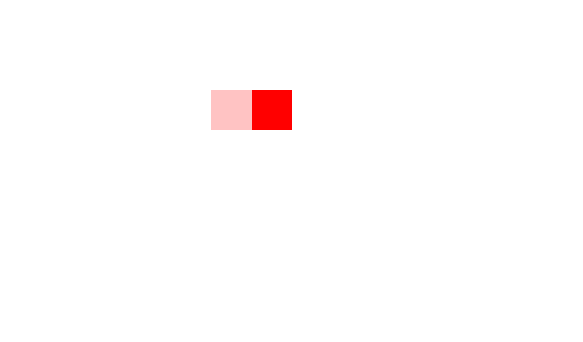

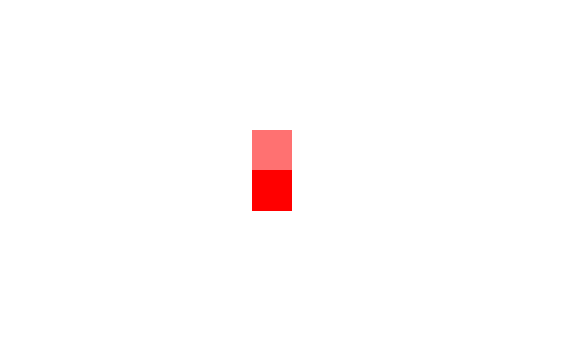

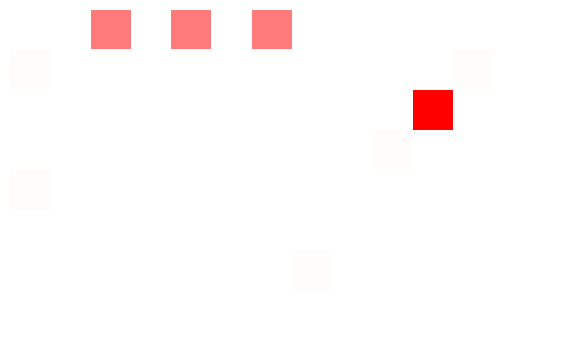

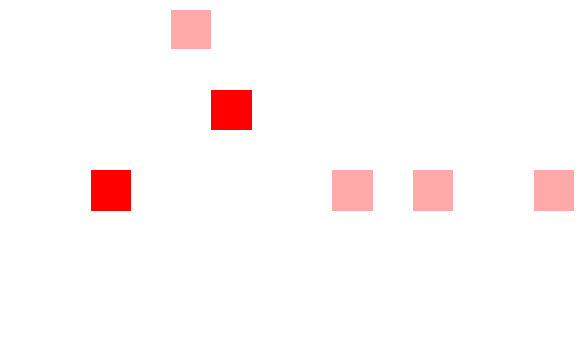

In [232]:
# valid_cell_index = 49

for valid_cell_index in [49, 107, 87, 57]:
    max_response = responsive_rois[valid_cell_index]

    # Assuming max_response["rf_on"] is your data
    data = max_response["rf_on"]
    max_val = np.max(data)
    threshold = 0.50 * max_val

    # Create a custom colormap
    colors = [(1, 1, 1), (1, 1, 1), (1, 0, 0)]  # White to white to red
    n_bins = 100  # Discretizes the interpolation into bins
    cmap_name = 'custom_cmap'

    # Create the colormap
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Create a normalization instance
    norm = Normalize(vmin=threshold, vmax=max_val)

    plt.figure(figsize=(16,28))
    plt.subplot(1,2,1)
    plt.imshow(data, cmap=cm, norm=norm)
    plt.axis('off')
    plt.show()

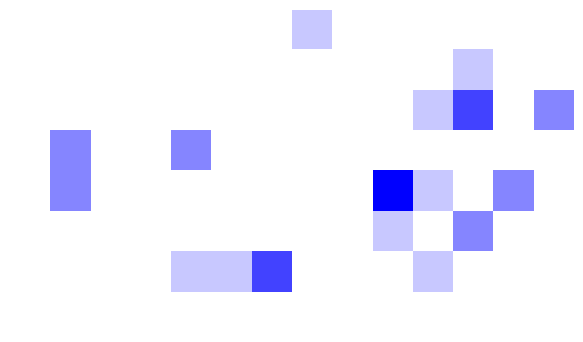

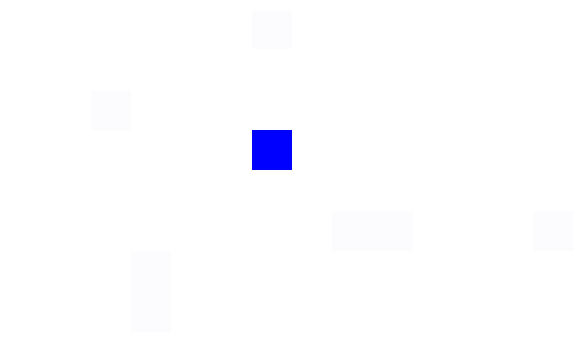

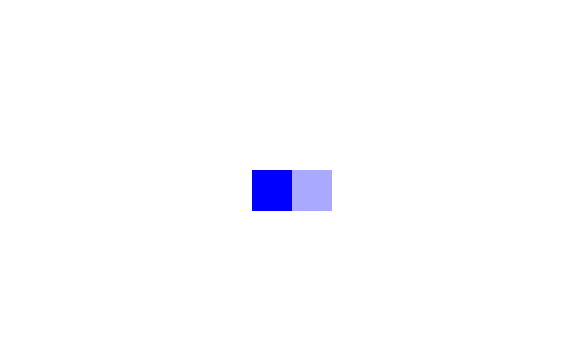

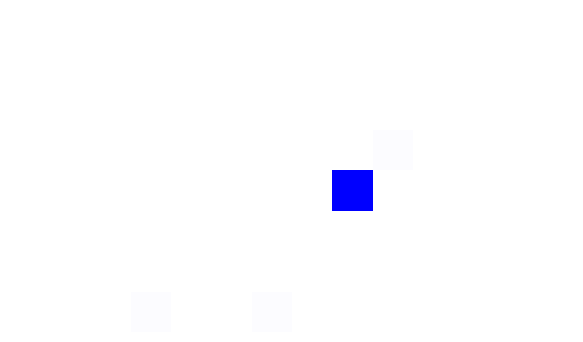

In [233]:
# valid_cell_index = 49

for valid_cell_index in [49, 107, 87, 57]:
    max_response = responsive_rois[valid_cell_index]

    # Assuming max_response["rf_on"] is your data
    data = max_response["rf_off"]
    max_val = np.max(data)
    threshold = 0.50 * max_val

    # Create a custom colormap
    colors = [(1, 1, 1), (1, 1, 1), (0, 0, 1)]  # White to white to red
    n_bins = 100  # Discretizes the interpolation into bins
    cmap_name = 'custom_cmap'

    # Create the colormap
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Create a normalization instance
    norm = Normalize(vmin=threshold, vmax=max_val)

    plt.figure(figsize=(16,28))
    plt.subplot(1,2,1)
    plt.imshow(data, cmap=cm, norm=norm)
    plt.axis('off')
    plt.show()